In [ ]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import tensorflow 
os.environ['KERAS_BACKEND'] = "tensorflow"
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# Import Dataset 1
dataH1 = pd.read_csv('/content/Hotel H1.csv')


In [ ]:
# Import Dataset 2
dataH2 = pd.read_csv('/content/Hotel H2.csv')

In [ ]:
# Overview of the datasets :
dataH1.shape

(40060, 31)

In [ ]:
dataH2.shape

(79330, 31)

In [ ]:
dataH1.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
dataH2.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [ ]:
# We add a new column to dataH1 to record that bookings belong to hotel 1:
dataH1['is_h1'] = 1

# We do the same for H2
dataH2['is_h1'] = 0

In [ ]:
# We merge the 2 datasets 
data = pd.concat(objs = [dataH1, dataH2], axis = 0)


In [ ]:
data.shape

(119390, 32)

In [ ]:
data.sample()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,is_h1
11903,1,323,2017,June,22,3,2,5,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,NULL,NULL,0,Transient,72.0,0,0,Canceled,2016-07-21,1


In [ ]:
# We check for missing values
data.isnull().sum()

IsCanceled                       0
LeadTime                         0
ArrivalDateYear                  0
ArrivalDateMonth                 0
ArrivalDateWeekNumber            0
ArrivalDateDayOfMonth            0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                           0
Children                         4
Babies                           0
Meal                             0
Country                        488
MarketSegment                    0
DistributionChannel              0
IsRepeatedGuest                  0
PreviousCancellations            0
PreviousBookingsNotCanceled      0
ReservedRoomType                 0
AssignedRoomType                 0
BookingChanges                   0
DepositType                      0
Agent                            0
Company                          0
DaysInWaitingList                0
CustomerType                     0
ADR                              0
RequiredCarParkingSpaces         0
TotalOfSpecialReques

In [ ]:
# We observe missing values for the variables children and country
# We remove the observations with NA values for children
data.dropna(subset=['Children'], inplace=True)

In [ ]:
# We replace the missing countries by Unknown
data['Country'].fillna("Unknown", inplace=True)

In [ ]:
# We check that no missing values remain:
data.isnull().sum().sum()

0

In [ ]:
# Checking data types:
data.dtypes
# We change children to integer type: 
data['Children'] = data['Children'].astype(int)

# We change reservation status date to datetime type: 
data['ReservationStatusDate'] = pd.to_datetime(data['ReservationStatusDate'])

In [ ]:
# Descriptive statistics
data.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,is_h1
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,2016.156593,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,0.031913,0.087121,0.137102,0.221131,2.321227,101.833541,0.062520,0.571340,0.335550
std,0.482913,106.863286,0.707456,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,0.175770,0.844350,1.497462,0.652315,17.595011,50.534664,0.245295,0.792798,0.472184
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.590000,0.000000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,1.000000


In [ ]:
# The plot shows that there is much more not canceled bookings than canceled

In [ ]:
# We create dummy variables for the qualitative variables
data = pd.get_dummies(data, columns=['ArrivalDateMonth', 'Meal', 'MarketSegment', 'DistributionChannel', 'ReservedRoomType', 'AssignedRoomType', 'DepositType', 'CustomerType'])


In [ ]:
X = data.drop(columns=['IsCanceled','ReservationStatus', 'Agent', 'Company', 'Country', 
                     'ReservationStatusDate'])
y = data['IsCanceled']


Text(0.5, 1.0, 'Percentage of Bookings per Status')

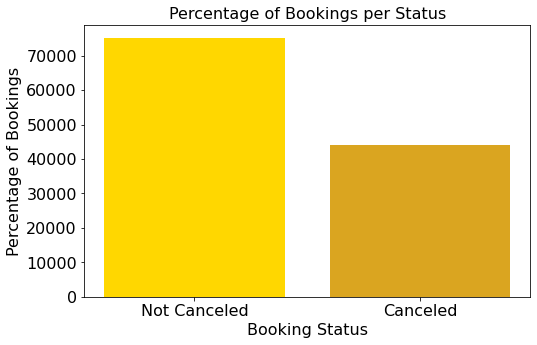

In [ ]:
# We plot the percentage of canceled vs not canceled bookings 

cancel_distribution = y.value_counts()

plt.figure(figsize = (8, 5))
plt.bar(cancel_distribution.keys().tolist(), cancel_distribution.tolist(), color = ['Gold', 'Goldenrod'])

plt.xlabel('Booking Status', fontsize = 16)
plt.ylabel('Percentage of Bookings', fontsize = 16)
plt.xticks([0.0, 1.0], ['Not Canceled', 'Canceled'], fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Percentage of Bookings per Status', fontsize = 16)



In [ ]:
# Now, we see that each qualitative variables are now dummy variables 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 79329
Data columns (total 82 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   IsCanceled                         119386 non-null  int64         
 1   LeadTime                           119386 non-null  int64         
 2   ArrivalDateYear                    119386 non-null  int64         
 3   ArrivalDateWeekNumber              119386 non-null  int64         
 4   ArrivalDateDayOfMonth              119386 non-null  int64         
 5   StaysInWeekendNights               119386 non-null  int64         
 6   StaysInWeekNights                  119386 non-null  int64         
 7   Adults                             119386 non-null  int64         
 8   Children                           119386 non-null  int64         
 9   Babies                             119386 non-null  int64         
 10  Country              

In [ ]:
# We split the data for test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, stratify=y, test_size=0.2)

In [ ]:
# We check in the train dataset if the type is correctly corrected
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95508 entries, 5734 to 6068
Data columns (total 76 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LeadTime                           95508 non-null  int64  
 1   ArrivalDateYear                    95508 non-null  int64  
 2   ArrivalDateWeekNumber              95508 non-null  int64  
 3   ArrivalDateDayOfMonth              95508 non-null  int64  
 4   StaysInWeekendNights               95508 non-null  int64  
 5   StaysInWeekNights                  95508 non-null  int64  
 6   Adults                             95508 non-null  int64  
 7   Children                           95508 non-null  int64  
 8   Babies                             95508 non-null  int64  
 9   IsRepeatedGuest                    95508 non-null  int64  
 10  PreviousCancellations              95508 non-null  int64  
 11  PreviousBookingsNotCanceled        95508 non-null  i

In [ ]:
# We check in the test dataset if the type is correctly corrected
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23878 entries, 20391 to 49667
Data columns (total 76 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LeadTime                           23878 non-null  int64  
 1   ArrivalDateYear                    23878 non-null  int64  
 2   ArrivalDateWeekNumber              23878 non-null  int64  
 3   ArrivalDateDayOfMonth              23878 non-null  int64  
 4   StaysInWeekendNights               23878 non-null  int64  
 5   StaysInWeekNights                  23878 non-null  int64  
 6   Adults                             23878 non-null  int64  
 7   Children                           23878 non-null  int64  
 8   Babies                             23878 non-null  int64  
 9   IsRepeatedGuest                    23878 non-null  int64  
 10  PreviousCancellations              23878 non-null  int64  
 11  PreviousBookingsNotCanceled        23878 non-null 

In [ ]:
# We do a correlation matrix to see if there is a strong correlation between variables
corr = data.corr()
corr.style.background_gradient(cmap = 'YlOrBr')

In [ ]:
# After the correlation matrix analysis, we decide to keep all the variables as they are not very correlated (<0.60)

In [ ]:
# We standardize the variables 
standardScaler = StandardScaler()
X_test = standardScaler.fit_transform(X_test)
X_test = standardScaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
X_test.shape

(23878, 76)

In [ ]:
X_train.shape

(95508, 76)

In [ ]:
# We build a Neural Network of 3 layers
classifier = Sequential()
classifier.add(Dense(units = 128, activation = 'relu', input_dim = 76)) #76 found with X_train.shape
classifier.add(Dropout(rate = 0.3))
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(rate = 0.3))
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(rate = 0.3))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9856      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

In [ ]:
history = classifier.fit(X_train, y_train, batch_size = 256, epochs = 50, shuffle = False, validation_split = 0.1)

Epoch 1/50
336/336 [==============================] - 3s 5ms/step - loss: 4.3160 - accuracy: 0.5838 - val_loss: 0.6628 - val_accuracy: 0.6258
Epoch 2/50
336/336 [==============================] - 2s 5ms/step - loss: 0.6784 - accuracy: 0.6276 - val_loss: 0.6612 - val_accuracy: 0.6258
Epoch 3/50
336/336 [==============================] - 2s 5ms/step - loss: 0.6649 - accuracy: 0.6289 - val_loss: 0.6612 - val_accuracy: 0.6258
Epoch 4/50
336/336 [==============================] - 2s 5ms/step - loss: 0.6626 - accuracy: 0.6295 - val_loss: 0.6612 - val_accuracy: 0.6258
Epoch 5/50
336/336 [==============================] - 2s 5ms/step - loss: 0.6610 - accuracy: 0.6297 - val_loss: 0.6612 - val_accuracy: 0.6258
Epoch 6/50
336/336 [==============================] - 2s 5ms/step - loss: 0.6605 - accuracy: 0.6297 - val_loss: 0.6612 - val_accuracy: 0.6258
Epoch 7/50
336/336 [==============================] - 2s 5ms/step - loss: 0.6598 - accuracy: 0.6299 - val_loss: 0.6612 - val_accuracy: 0.6258
Epoch 

In [ ]:
# We get this confusion matrix above with an accuracy of 75%
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Confusion matrix:
[[15034     0]
 [ 8844     0]]
Accuracy: 62.96%
